In [325]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *
import pandas as pd


def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [326]:
df = pd.read_json('data/feature_extracted.ndjson', lines=True)


In [327]:
df = df.fillna(0)
print(len(df))
df = df[df['white_cpl'].apply(lambda x: len(x) > 0)]
df = df[df['black_cpl'].apply(lambda x: len(x) > 0)]
print(len(df))



2400
2395


In [328]:
df["ECO"] = df["ECO"].astype('category')
df["Opening"] = df["Opening"].astype('category')
df["result"] = df["result"].astype('category')

df["mean_elos"] = df[['white_elo', 'black_elo']].mean(axis=1)
df["diff_elos"] = df['white_elo'] - df['black_elo']

df['white_mean'] = df['white_cpl'].apply(np.mean)
df['white_std'] = df['white_cpl'].apply(np.std)
df['white_min'] = df['white_cpl'].apply(np.min)
df['white_max'] = df['white_cpl'].apply(np.max)

df['black_mean'] = df['black_cpl'].apply(np.mean)
df['black_std'] = df['black_cpl'].apply(np.std)
df['black_min'] = df['black_cpl'].apply(np.min)
df['black_max'] = df['black_cpl'].apply(np.max)

In [329]:
cols = df.columns.tolist()

to_remove = ["moves", "white_elo", "black_elo", "Opening", "white_cpl", "black_cpl", "diff_elos"]

dependent_var = ["mean_elos"]
cat_vars = ["result", "ECO"]
cont_vars = [col for col in cols if col not in (cat_vars + dependent_var + to_remove)]

dep_var = "mean_elos"

In [330]:
df = df.drop(columns=to_remove)

In [308]:
df["mean_elos"] = np.log(df["mean_elos"])


In [331]:
cont_nn,cat_nn = cont_cat_split(df, dep_var=dep_var)

In [332]:
cont_nn

['total_moves',
 'end_r',
 'end_n',
 'end_b',
 'end_q',
 'end_p',
 'end_P',
 'end_B',
 'end_N',
 'end_R',
 'end_Q',
 'queen_moved_at',
 'total_checks',
 'first_check_at',
 'queen_changed_at',
 'promotion',
 'can_claim_draw',
 'white_mean',
 'white_std',
 'white_min',
 'white_max',
 'black_mean',
 'black_std',
 'black_min',
 'black_max']

In [333]:
cat_nn

['result', 'ECO', 'end_k', 'end_K']

In [334]:
df[cat_nn].nunique()

result      3
ECO       361
end_k       1
end_K       1
dtype: int64

In [335]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [336]:
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cont_names = cont_vars,
                   cat_names = cat_vars,
                   y_names='mean_elos',
                   splits=splits)


In [337]:
dls = to.dataloaders(1024)

This is the min and max of the mean elo ratings

In [338]:
y = to.train.y
y.min(),y.max()

(1385.5, 2788.5)

In [339]:
learn = tabular_learner(dls, y_range=(8,12), layers=[200,100],
                        n_out=1, loss_func=F.mse_loss)


"""By default, for tabular data fastai creates a neural network with two hidden layers, with 200 and 100 activations, respectively. 
This works quite well for small datasets, but here we've got quite a large dataset, so we increase the layer sizes to 500 and 250:"""

"By default, for tabular data fastai creates a neural network with two hidden layers, with 200 and 100 activations, respectively. \nThis works quite well for small datasets, but here we've got quite a large dataset, so we increase the layer sizes to 500 and 250:"

c:\Users\natal\anaconda3\envs\dsp\Lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch

SuggestedLRs(valley=0.0691830962896347)

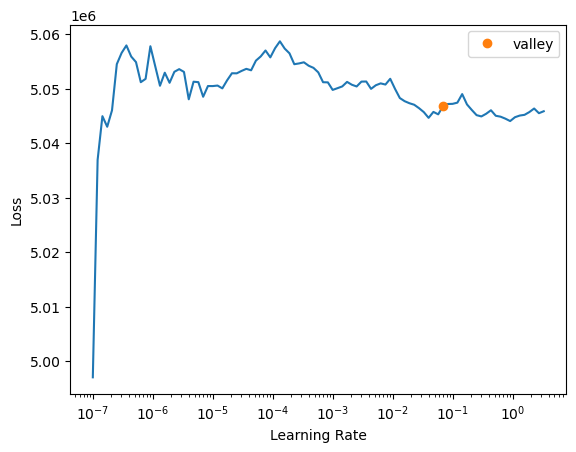

In [340]:
learn.lr_find()

In [342]:
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,time
0,5064428.000000,5089730.000000,00:00
1,5032447.500000,5089631.000000,00:00
2,5017890.500000,5089487.500000,00:00
3,5016276.500000,5089415.000000,00:00
4,5017615.500000,5089347.500000,00:00


In [343]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

2255.958444

In [345]:
(preds)

tensor([[ 8.6463],
        [10.0059],
        [10.4925],
        [10.5952],
        [ 9.3066],
        [10.8086],
        [10.6808],
        [10.7729],
        [ 8.9629],
        [ 8.8189],
        [ 8.1167],
        [ 9.8870],
        [ 9.9737],
        [10.5594],
        [10.5142],
        [10.8644],
        [10.2927],
        [ 8.7716],
        [ 9.0807],
        [10.7229],
        [ 9.9601],
        [10.6313],
        [ 9.1988],
        [10.0287],
        [10.5468],
        [ 9.1842],
        [10.4776],
        [ 8.9986],
        [10.5635],
        [10.5782],
        [ 9.9974],
        [10.1865],
        [10.7313],
        [10.7438],
        [10.1690],
        [ 9.7707],
        [10.5839],
        [10.8548],
        [ 9.9893],
        [10.5242],
        [10.7347],
        [ 9.3021],
        [10.6158],
        [10.5644],
        [10.6795],
        [10.8876],
        [10.6762],
        [10.3188],
        [ 9.6629],
        [10.1441],
        [10.7510],
        [ 9.1998],
        [10.

In [270]:
len(to.train),len(to.valid)

(800, 200)

In [ ]:
dls = to.dataloaders(bs=64)

In [267]:
# Create a Tabular Learner
learn = tabular_learner(dls, metrics=mse)

learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,mse,time
0,5075730.500000,5075101.000000,5075101.000000,00:00
1,5049903.500000,5073363.000000,5073363.000000,00:00
2,5090073.000000,5073541.000000,5073541.000000,00:00


In [265]:
# Create a Tabular Learner
learn = tabular_learner(dls, metrics=mse)
# Train the model
learn.fit(n_epoch=10)

epoch,train_loss,valid_loss,mse,time
0,5117917.500000,5074729.000000,5074729.000000,00:00
1,5108344.000000,5072931.500000,5072931.500000,00:00
2,5106670.500000,5070791.500000,5070791.500000,00:00
3,5097919.000000,5068640.000000,5068640.000000,00:00
4,5100142.000000,5066560.500000,5066560.500000,00:00
5,5082546.500000,5064120.500000,5064120.500000,00:00
6,5081728.500000,5057863.000000,5057863.000000,00:00
7,5103932.000000,5060843.500000,5060843.500000,00:00
8,5107096.500000,5054261.000000,5054261.000000,00:00
9,5099569.500000,5048762.000000,5048762.000000,00:00


In [249]:
# Transform test data for prediction
dl = learn.dls.test_dl(df_test)
preds = learn.get_preds(dl=dl)

# Reformat predictions
preds = [x.item() for x in preds[0]]

In [236]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,mae,time
0,5139587.000000,5076604.500000,2241.161865,00:00
1,5101363.500000,5076374.000000,2241.156494,00:00
2,5105875.500000,5075810.000000,2241.100586,00:00
3,5101450.500000,5075550.500000,2241.081543,00:00
4,5110882.000000,5074889.500000,2240.952393,00:00


In [237]:
learn.show_results()

,result,ECO,total_moves,end_r,end_n,end_b,end_q,end_k,end_p,end_P,end_B,end_N,end_R,end_Q,end_K,queen_moved_at,total_checks,first_check_at,queen_changed_at,promotion,can_claim_draw,white_mean,white_std,white_min,white_max,black_mean,black_std,black_min,black_max,mean_elos,mean_elos_pred
0,2.0,233.0,0.136571,-0.112881,-0.789868,0.499744,-0.977746,0.0,-0.635999,-0.101658,-0.939052,-0.841997,-1.480573,1.033047,0.0,-0.797802,0.708405,-0.312581,0.437735,-0.195639,-0.175862,-1.175328,-0.922107,0.291636,-0.850207,-1.069246,-0.872700,0.062760,-0.935904,2526.0,9.622443
1,2.0,72.0,1.197927,-1.421653,0.686520,-0.980980,-0.977746,0.0,-2.225997,-1.665626,-0.939052,-0.841997,-1.480573,1.033047,0.0,-1.031419,0.480714,0.770264,0.628503,3.621709,-0.175862,0.530556,0.370384,-0.675238,0.681189,-0.129114,0.296271,-0.913284,0.280507,2105.5,-0.501533
2,3.0,121.0,2.134417,-1.421653,-0.789868,-0.980980,-0.977746,0.0,-1.695998,-2.186949,-0.939052,0.675115,-1.480573,-0.968013,0.0,-1.031419,0.025331,-1.106668,3.490033,3.621709,-0.175862,-0.281247,-0.029983,0.224180,0.446313,-0.308282,-0.501175,0.121322,-0.420927,2422.5,-1.003433
3,3.0,64.0,1.759821,-1.421653,-0.789868,0.499744,-0.977746,0.0,-0.635999,-0.622981,0.514027,-0.841997,-1.480573,-0.968013,0.0,2.940071,-0.202361,1.997489,1.582347,-0.195639,-0.175862,-0.248109,-0.343944,0.471520,-0.032836,-0.162229,-0.324907,0.511740,-0.056892,1789.0,-0.142673
4,2.0,103.0,0.823331,-1.421653,-0.789868,0.499744,-0.977746,0.0,-1.695998,-0.622981,0.514027,-0.841997,-1.480573,-0.968013,0.0,-0.096951,-0.657744,1.925299,1.900294,-0.195639,-0.175862,0.942150,0.308351,0.404063,0.136275,0.967025,0.784973,-0.444783,1.097367,2069.0,-5.442462
5,3.0,360.0,0.448735,-0.112881,-0.789868,0.499744,-0.977746,0.0,-0.635999,0.419665,0.514027,-0.841997,-0.137650,-0.968013,0.0,2.472836,-0.202361,0.264936,1.518757,-0.195639,-0.175862,-0.477838,-0.608994,0.449034,-0.465009,-0.577019,-0.383407,0.199406,-0.154560,2466.0,1.283484
6,1.0,42.0,0.636033,-1.421653,0.686520,-0.980980,1.022757,0.0,0.424000,-0.622981,0.514027,-0.841997,-1.480573,1.033047,0.0,0.603900,0.936097,0.842454,-0.961236,-0.195639,-0.175862,0.143678,-0.008873,0.696374,-0.004651,-0.948698,-1.121014,0.316531,-0.971419,1912.5,5.771621
7,1.0,42.0,0.074139,1.195890,0.686520,0.499744,-0.977746,0.0,-0.635999,0.419665,-0.939052,-0.841997,1.205274,-0.968013,0.0,0.370283,-0.202361,-0.240392,0.564914,-0.195639,-0.175862,0.515831,0.906750,0.134238,1.827388,-0.599604,-0.294213,-1.576994,-0.740568,2587.5,-0.731685
8,2.0,113.0,0.823331,-0.112881,-0.789868,0.499744,-0.977746,0.0,-0.106000,0.419665,0.514027,-0.841997,-0.137650,-0.968013,0.0,-1.031419,-0.202361,0.842454,0.437735,-0.195639,-0.175862,-0.627691,-0.589558,-0.180558,-0.521379,-0.378013,-0.423613,0.160364,-0.509716,2272.5,4.144791


In [240]:
test_dl = learn.dls.test_dl(df_test)
preds, _ = learn.get_preds(dl=test_dl)

In [242]:
preds

tensor([[ 3.2833],
        [-5.9331],
        [ 1.3630],
        ...,
        [-5.3649],
        [-3.6942],
        [ 4.9687]])

0       2491.5
1       1957.0
2       2318.5
3       2121.5
4       2345.5
         ...  
2395    2260.5
2396    2178.5
2397    2236.0
2398    2546.5
2399    2348.0
Name: mean_elos, Length: 2395, dtype: float64